In [1]:
import os 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image  
import pandas as pd 
from numpy import savetxt
from sklearn.model_selection import train_test_split
from random import randrange

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dense,Flatten,Dropout,AveragePooling2D

In [2]:
data = []
labels = []

directory = os.getcwd() #get the current directory

In [3]:
data_dir = os.path.join(directory,'archive')
train_path = os.path.join(data_dir,'Train')
test_path = os.path.join(data_dir,'Test')

num_classes = len(os.listdir(train_path))

In [4]:
#visualizing the train data images
#first 9 images on a secific class
def visualizing(cls):
    count = 1;
    #retrieves the path of each image class and list images in an array
    image_list = np.array(os.listdir(os.path.join(train_path,str(cls))))
    image_list.sort()

    for j in image_list:
        img = Image.open(os.path.join(train_path,str(cls),j))
        img = img.resize((30,30))
        plt.subplot(3,3,count)
        plt.imshow(img, origin='lower')
        count = count+1
        if count == 10:
            break;
    plt.show()

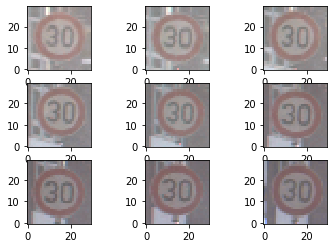

In [5]:
visualizing(1) #outputs the first 9 images of a specific class

In [6]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [7]:
#count of each speed class
df = pd.read_csv(os.path.join(directory,'archive','Train.csv'))
label_test_data= df.ClassId 
#[df.ClassId <=8]
(label, count) = np.unique(np.array(label_test_data), return_counts=True)



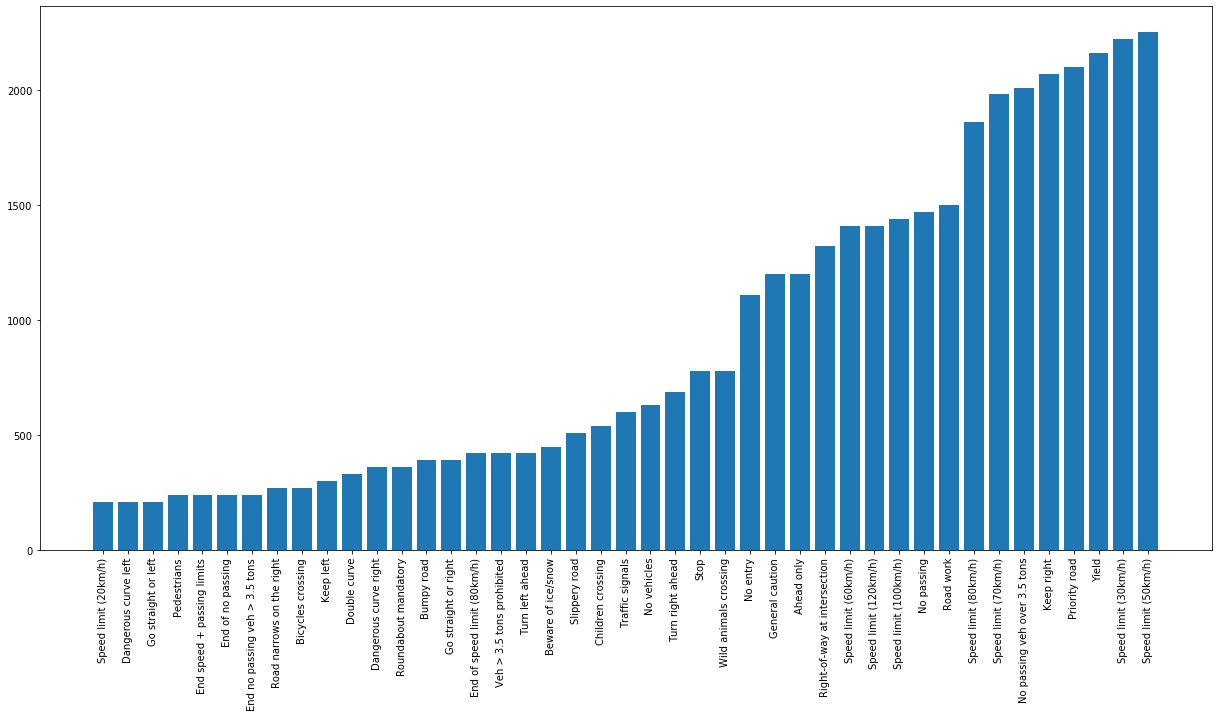

In [8]:
#visualizing the dataset
class_num = []

for i in range(num_classes):
    class_num.append(classes[i]) #extract the name of the each class

zipped = zip(class_num,count) #zips the count and name of each class 
zip_data = sorted(list(zipped), key = lambda x: x[1]) #sorting key values
zip_data = list(zip(*zip_data)) #unzip data

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(zip_data[0],zip_data[1])
plt.xticks(zip_data[0], rotation='vertical')
plt.show()

In [9]:
image_data = []
image_labels = []

#collecting the trained data
def collecting_data(data_path,trim_idx):
    global image_data
    global image_labels

    for cls in range(num_classes):
        path = os.path.join(data_path,str(cls))
        images = os.listdir(path)
        length_img = len(images)
        if length_img-trim_idx <= 0:
            return print("invalid trim")
        
        for j in images[:length_img-trim_idx]:
            img = Image.open(os.path.join(path,j))
            img = img.resize((30,30))
            image_data.append(np.array(img))
            image_labels.append(cls)
            
    # Changing the list to numpy array
    image_data = np.array(image_data)
    image_labels = np.array(image_labels)
    
    print(image_data.shape, image_labels.shape)
    
    return (image_data, image_labels)

In [10]:
(image_data, image_labels) = collecting_data(train_path,0)

(39209, 30, 30, 3) (39209,)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(image_data, image_labels, test_size=0.2, random_state=42)

In [12]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_test.shape)

(31367, 43)
(7842, 43)


In [13]:

#used LeNet-5, added another conv layer, converted kernel size to (3,3) from (5,5)
model = Sequential()

#convolutional block 1
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation = 'relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation = 'relu'))
model.add(AveragePooling2D(pool_size=(2,2)))


#convolutional block 2
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation = 'relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation = 'relu'))
model.add(AveragePooling2D(pool_size=(2,2)))


#convolutional block 3
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation = 'relu'))
model.add(AveragePooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(43, activation='softmax'))


opt = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 128)         7

In [15]:
epochs = 25
history = model.fit(x_train, y_train, batch_size = 64, epochs = epochs, validation_data=(x_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/25
31367/31367 [==============================] - 5s 171us/sample - loss: 1.1562 - acc: 0.6914 - val_loss: 0.2977 - val_acc: 0.9214
Epoch 2/25
31367/31367 [==============================] - 3s 94us/sample - loss: 0.1935 - acc: 0.9492 - val_loss: 0.1049 - val_acc: 0.9712
Epoch 3/25
31367/31367 [==============================] - 3s 96us/sample - loss: 0.1051 - acc: 0.9724 - val_loss: 0.0964 - val_acc: 0.9744
Epoch 4/25
31367/31367 [==============================] - 3s 97us/sample - loss: 0.0686 - acc: 0.9826 - val_loss: 0.0596 - val_acc: 0.9847
Epoch 5/25
31367/31367 [==============================] - 3s 99us/sample - loss: 0.0497 - acc: 0.9869 - val_loss: 0.0533 - val_acc: 0.9869
Epoch 6/25
31367/31367 [==============================] - 3s 89us/sample - loss: 0.0432 - acc: 0.9879 - val_loss: 0.0454 - val_acc: 0.9875
Epoch 7/25
31367/31367 [==============================] - 3s 98us/sample - loss: 0.0508 - acc: 0.9875 - val_loss: 0.

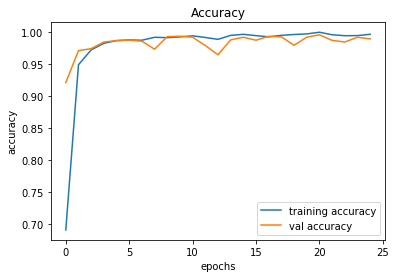

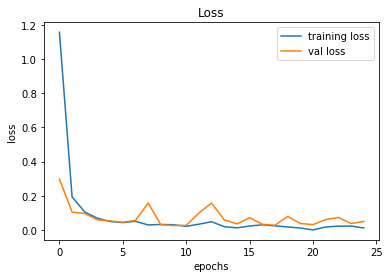

In [16]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
#testing accuracy on test dataset
test_file = pd.read_csv(os.path.join(data_dir,'Test.csv'))

labels = test_file["ClassId"].values
imgs = test_file["Path"].values

data=[]

for img in imgs:
    image = Image.open(os.path.join(data_dir,img))
    image = image.resize((30,30))
    data.append(np.array(image))

test_data=np.array(data)

predict_class = model.predict_classes(test_data)

print(len(test_data))

12630


In [18]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report


print(accuracy_score(labels, predict_class))
print(balanced_accuracy_score(labels, predict_class))
print("\n")

# https://medium.com/@kennymiyasato/classification-report-precision-recall-f1-score-accuracy-16a245a437a5
print(classification_report(labels, predict_class))

0.956769596199525
0.928405037048111


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        60
           1       0.92      0.99      0.95       720
           2       0.98      1.00      0.99       750
           3       0.95      0.98      0.96       450
           4       0.99      0.97      0.98       660
           5       0.93      0.95      0.94       630
           6       0.97      0.92      0.95       150
           7       0.96      0.94      0.95       450
           8       0.98      0.93      0.96       450
           9       0.99      0.99      0.99       480
          10       0.99      0.99      0.99       660
          11       0.99      0.96      0.97       420
          12       0.99      0.97      0.98       690
          13       0.99      0.99      0.99       720
          14       1.00      0.99      0.99       270
          15       0.97      0.99      0.98       210
          16       0.99      0.98      0.99

(3, 3, 32)


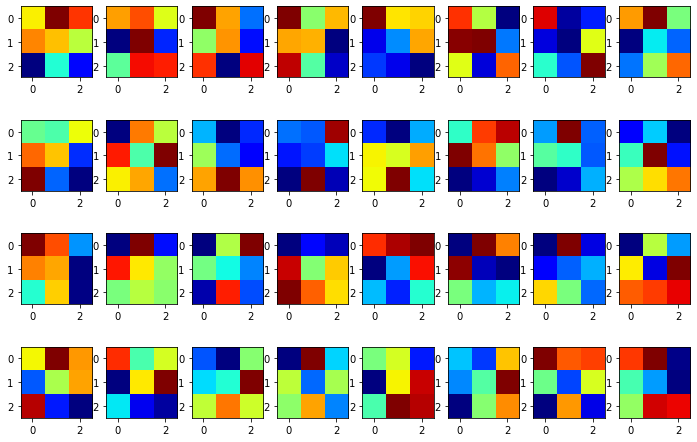

In [19]:
layer_weights = model.layers[0].get_weights()[0][0] #first layer,actual weights,0th filter
print(layer_weights.shape)

col_size = 8
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
    for col in range(0,col_size):
        ax[row][col].imshow(layer_weights[:,:,filter_index],cmap='jet')
        filter_index += 1
        
#reference : https://www.codeastar.com/visualize-convolutional-neural-network/

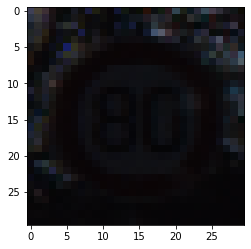

In [20]:
plt.imshow(x_train[3]);

In [21]:
layer_outputs = [layer.output for layer in model.layers] #outputs the dimensions of each layer 
act_model = Model(inputs=model.input, outputs=layer_outputs) 

activations = act_model.predict(x_train[3].reshape(1,30,30,3)) #return number of activation layers in a specific image
print(len(activations))

def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='jet')
            activation_index += 1
            

            
#reference: https://androidkt.com/get-output-of-intermediate-layers-keras/

11


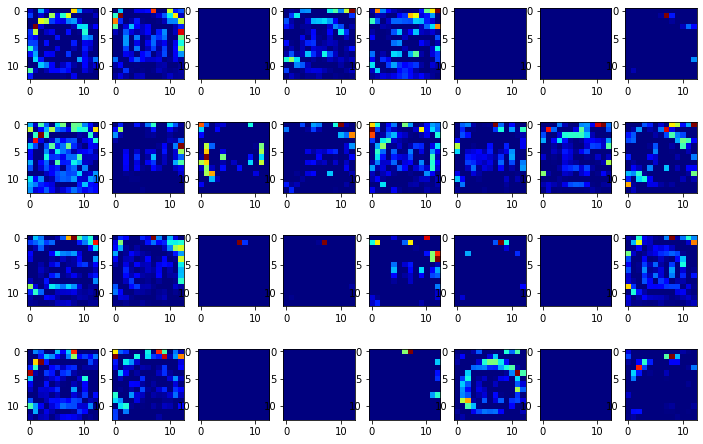

In [22]:
display_activation(activations,8,4,2) #2nd activation layer of image
   